# First Real Toy NN 

### Needed Imports

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import cifar

### Data Generation 

Data will be a spiral dataset which is generated from the following code:

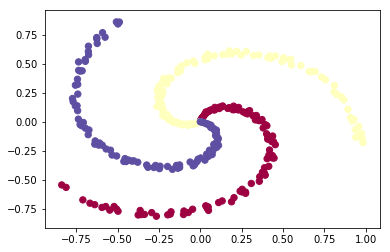

In [2]:
N = 100  # number of  points per class
D = 2  # dimensionality
K = 3  # number of classes
X = np.zeros((N*K, D))  # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8')  # class labels
for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N)  # radius
    t = np.linspace(j*4, (j+1)*4, N) + np.random.rand(N) * 0.2  # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

# Lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

Normally the data should be preprocessed such that each feature should have 0 mean and unit std deviation, but this step is useless sinche the features are already in the range -1 to 1.

## Training a Softmax Linear Classifier 

### Parameter Initialization 

The Softmax classifier has a linear score function and uses the cross-entropy loss. The parameters of the linear classifier consist of a weight matrix W and a bias vector b for each class. These parameters are initialize to random numbers:

In [5]:
# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3  # regularization strength

Notice the other 2 hyperparameters, they will be explained later

### Compute class scores 

The class score is very easy to compute, it is just a linear mapping:

In [7]:
# compute class scores for a linear classifier
scores = np.dot(X, W) + b

In this example we have 300 2-D points and the scores array will have size [300x3] (3 classes)

### Compute the loss 

First the data loss needs to be computed, it is defined as the average cross-entropy loss.

In [8]:
def compute_data_loss(X, scores):
    num_examples = X.shape[0]
    # get unnormalized probabilities
    exp_scores = np.exp(scores)
    # normalize them for each example
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # get the log probabilities
    correct_logprobs = -np.log(probs[range(num_examples), y])
    # compute and return the average cross-entropy loss
    return np.sum(correct_logprobs)/num_examples

Compute also the regularization loss

In [9]:
def compute_reg_loss(W, reg):
    return 0.5*reg*np.sum(W*W)

Combine both partial loss into the total loss function

In [10]:
def compute_loss(X, W, scores, reg):
    data_loss = compute_data_loss(X, scores)
    reg_loss = compute_reg_loss(W, reg)
    return data_loss + reg_loss

### Compute Analytic Gradient with Backpropagation 